In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


maximum rows are in object datatype which is categorical,

our target variable churn is categorical type hence we will use the classifier models

# EDA and Feature Engineering

In [3]:
df.shape

(7043, 21)

there are 7043 rows and 21 columns

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

there are object int and float datatypes present in the dataset

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

there is no null values present in the dataset

In [6]:
df.isin([' ']).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

instead of null values there are blank values present in totalcharges column we nedd to impute those

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

replaced blank values with nan

In [8]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

now it shows 11 null values in totalcharges column

In [9]:
df['TotalCharges']=df['TotalCharges'].astype(float)

converted the column to float datatype

In [10]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

replaced the null values with the mean values

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

now there are no null values present

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

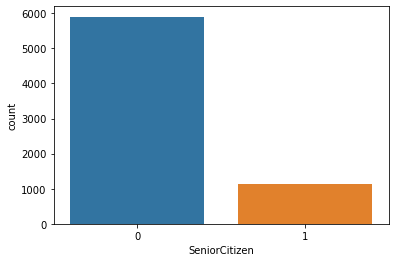

In [12]:
sn.countplot(df['SeniorCitizen'])

there are max no senior citizens

In [14]:
a=df.describe(include=['O']).columns

saving the object datatypes in a variable

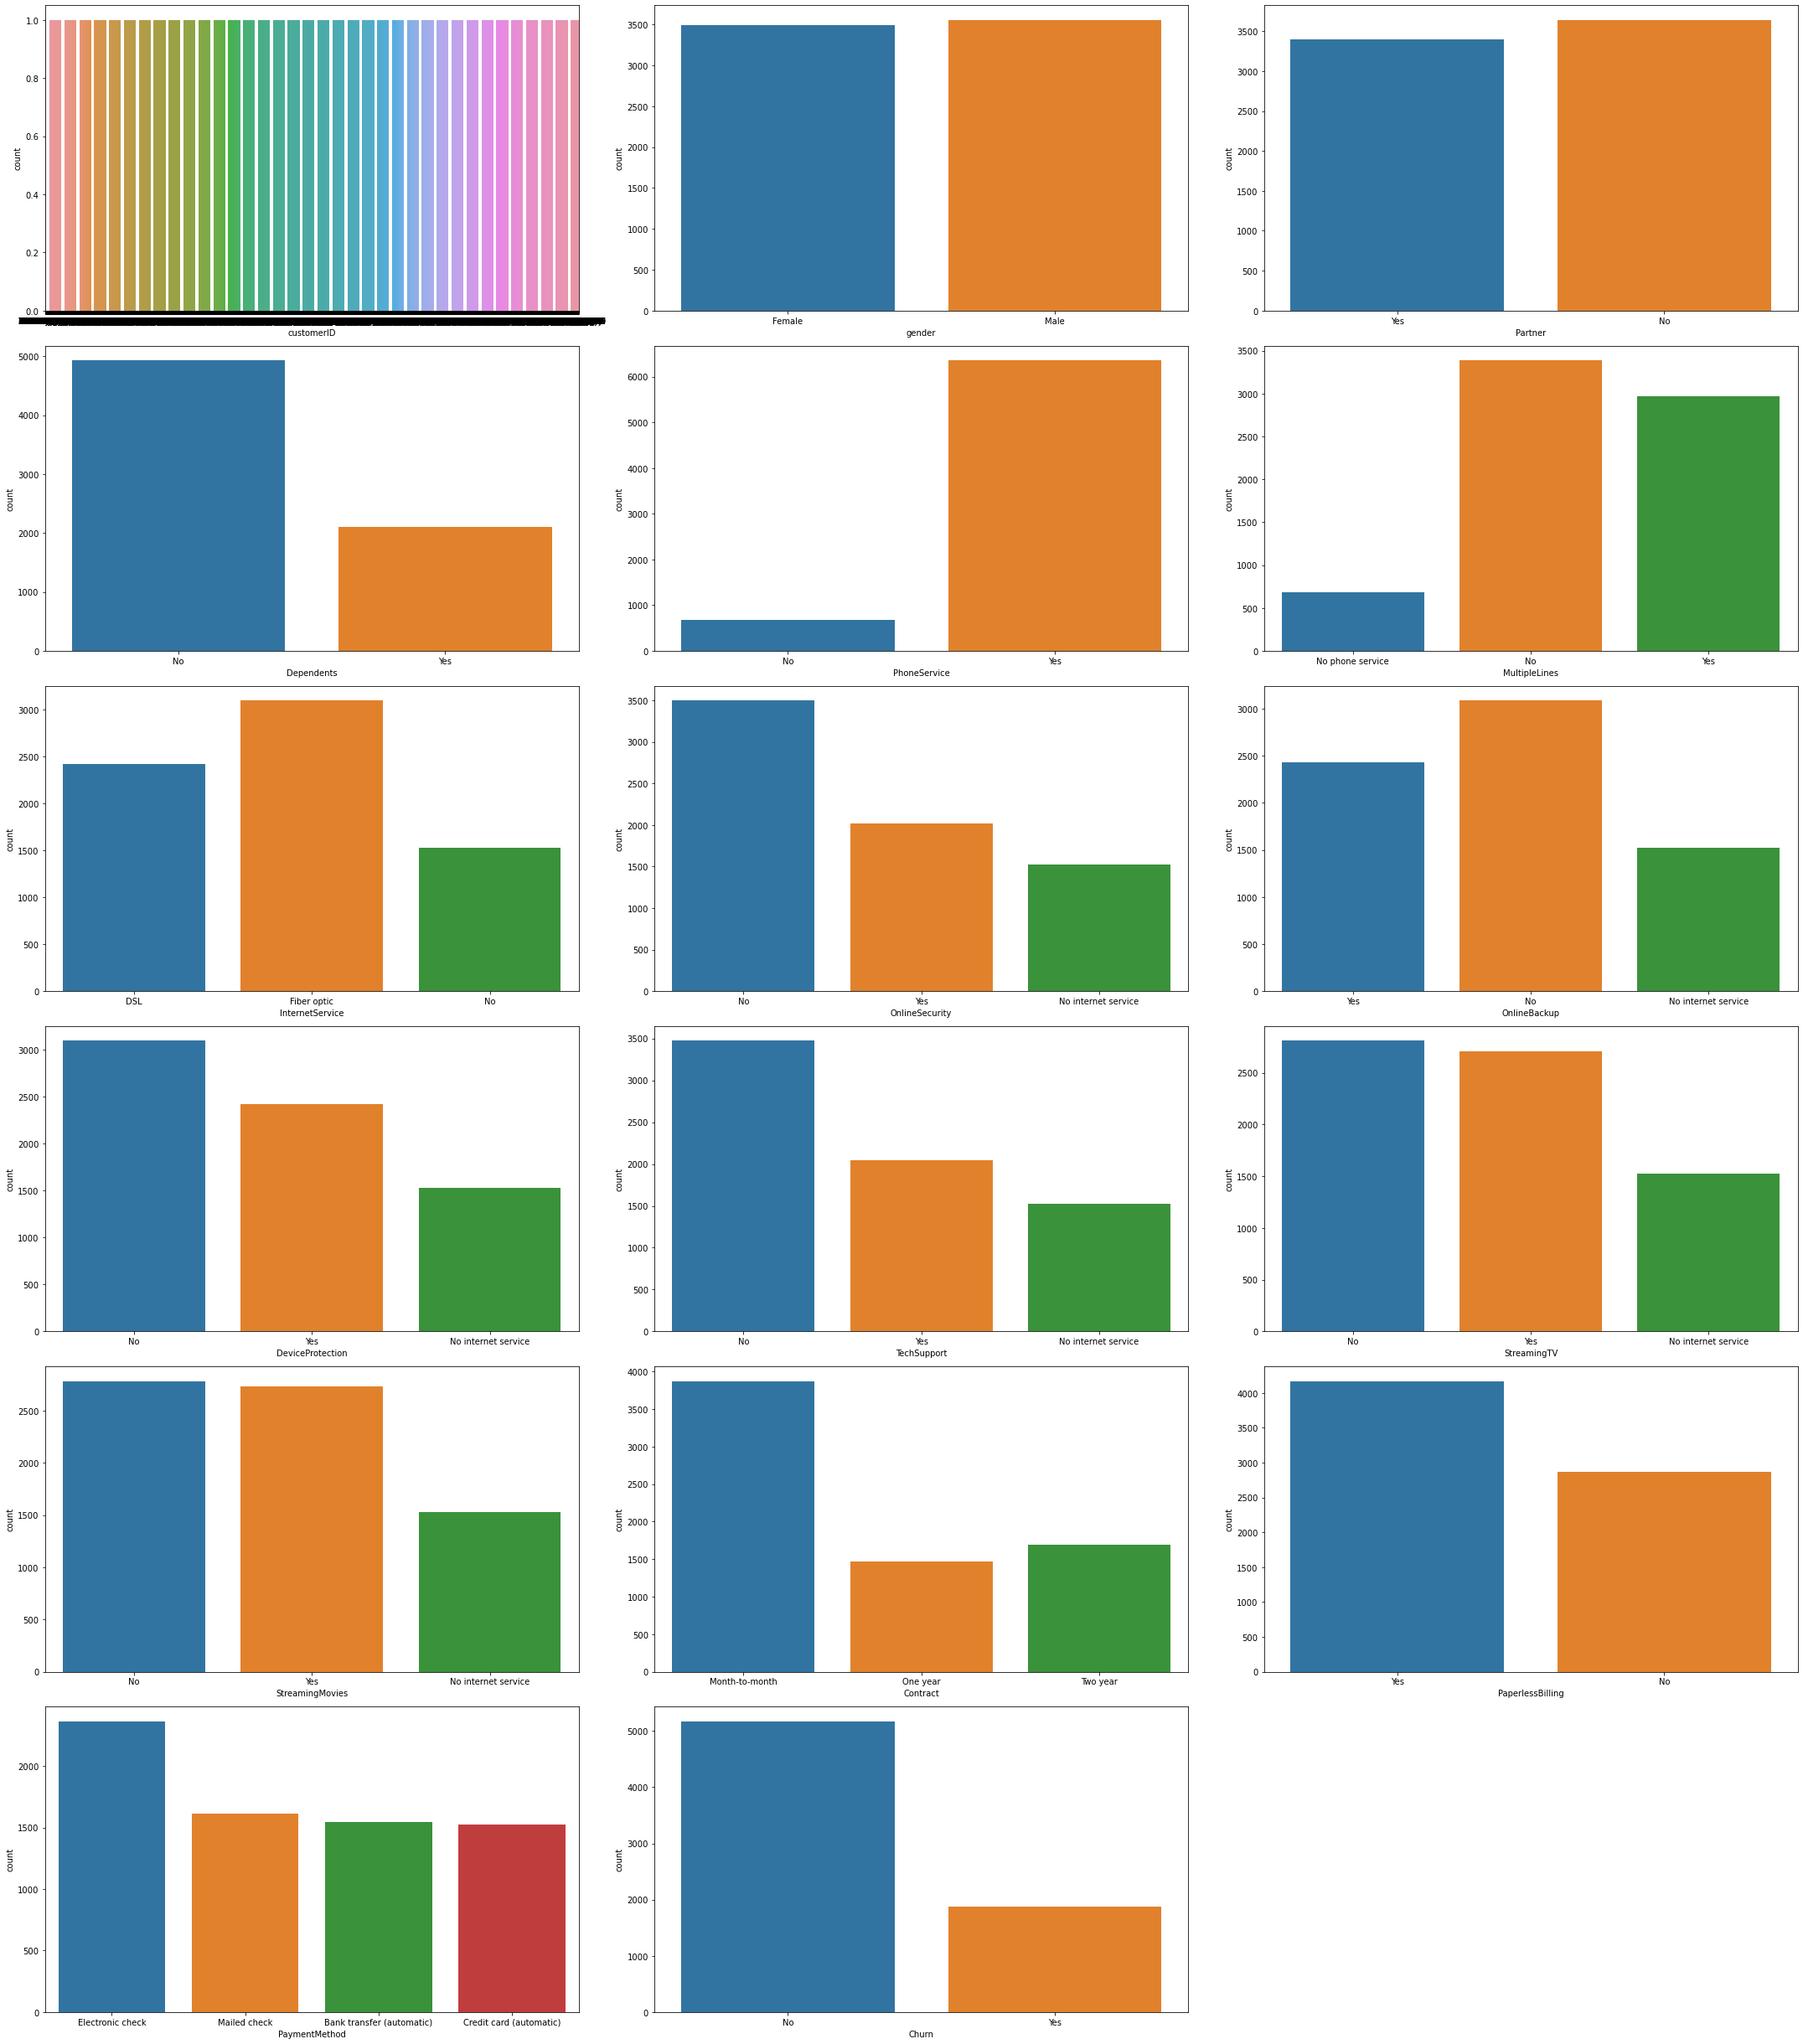

In [15]:
plt.figure(figsize=(30,34))
for i in range(len(a)):
    plt.subplot(6,3,i+1)
    sn.countplot(df[a[i]])
    plt.tight_layout()

count of gender is almost same

there are max people with no partners

there are max people with no dependents

max people has phone service

max people do not have multiplelines

max people has fiberoptic internet service

max people doesnt have onlinesecurity

max people doesnt have online backup

max people doesnt have Streamingtv

max people do have paperless billing

churn row is imbalanced we need to balance it

max people have month to month contract

max people doesnt have taech support

max people  have electronic check

max people doesnt have device protection



In [16]:
for i in a:
    print(i)
    print(df[i].value_counts())
    print('\n')

customerID
2325-NBPZG    1
7593-XFKDI    1
6862-CQUMB    1
0902-RFHOF    1
8564-LDKFL    1
             ..
8166-ZZTFS    1
9272-LSVYH    1
8229-BUJHX    1
5753-QQWPW    1
2843-CQMEG    1
Name: customerID, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: gender, dtype: int64


Partner
No     3641
Yes    3402
Name: Partner, dtype: int64


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype:

we have to drop the customer id as all the values are unique

In [17]:
df.drop('customerID',axis=1,inplace=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

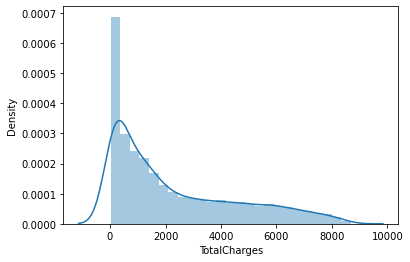

In [18]:
sn.distplot(df['TotalCharges'])

graph is skewed

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

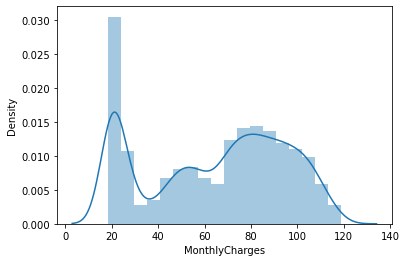

In [19]:
sn.distplot(df['MonthlyCharges'])

graph is skewed

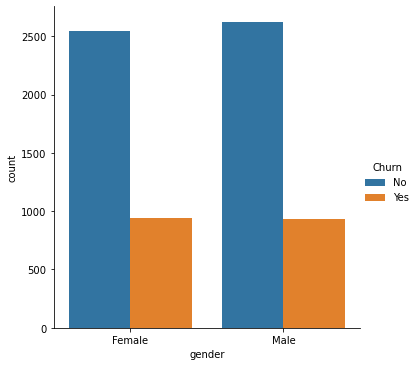

In [20]:
sn.catplot(x='gender',hue='Churn',kind='count',data=df)

the curn ratio in both the genders is almost similar

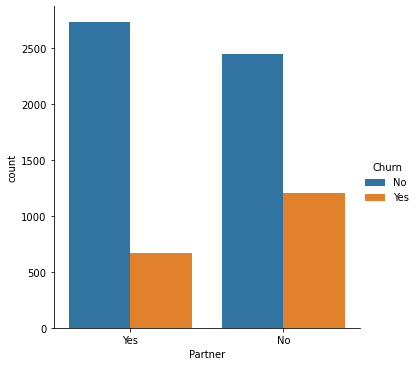

In [21]:
sn.catplot(x='Partner',hue='Churn',kind='count',data=df)

max people with partners doesnt have churn whereas people with no partners have high churn

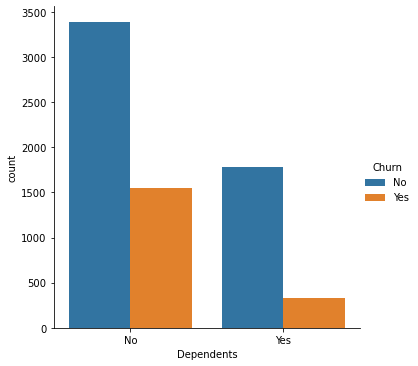

In [22]:
sn.catplot(x='Dependents',hue='Churn',kind='count',data=df)

people with no dependents have no churn

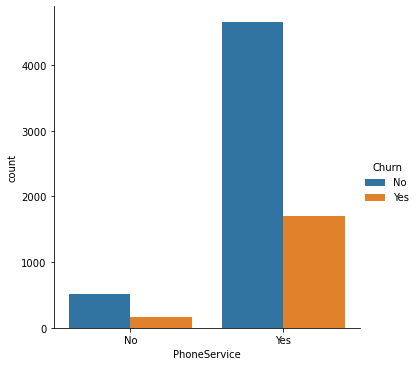

In [23]:
sn.catplot(x='PhoneService',hue='Churn',kind='count',data=df)

people with phone servive have no churn

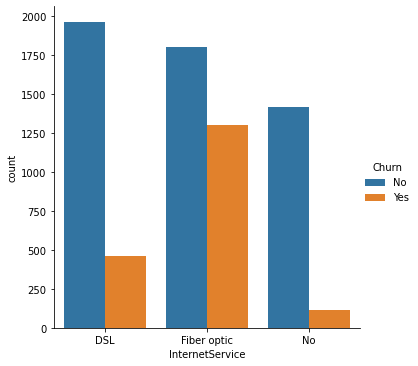

In [24]:
sn.catplot(x='InternetService',hue='Churn',kind='count',data=df)

people with DSL internet service are with no churn

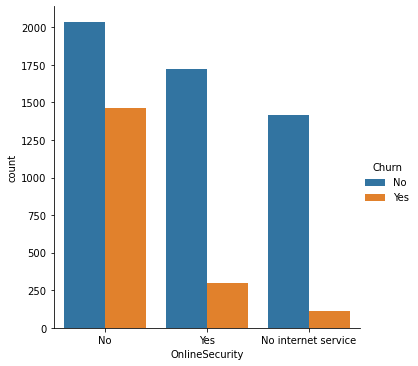

In [25]:
sn.catplot(x='OnlineSecurity',hue='Churn',kind='count',data=df)

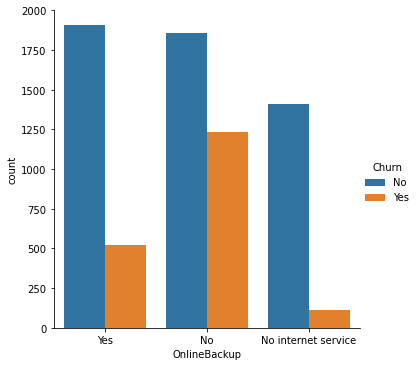

In [26]:
sn.catplot(x='OnlineBackup',hue='Churn',kind='count',data=df)

either with online backup or not max churn is no in both cases

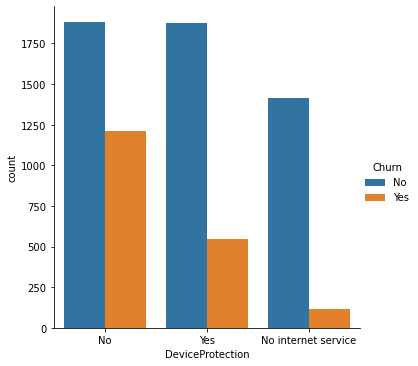

In [27]:
sn.catplot(x='DeviceProtection',hue='Churn',kind='count',data=df)

either with deviceprotection or not max churn is no in both cases

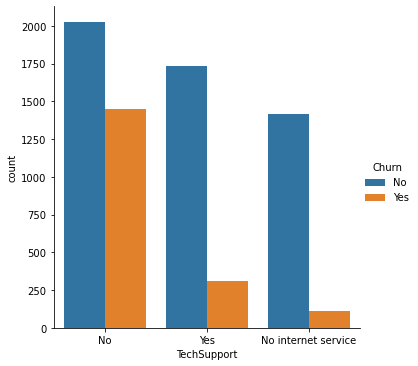

In [28]:
sn.catplot(x='TechSupport',hue='Churn',kind='count',data=df)

people with no tech support have max churn of no

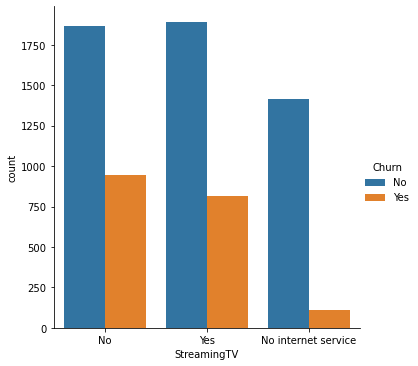

In [29]:
sn.catplot(x='StreamingTV',hue='Churn',kind='count',data=df)

either with StreamingTV or not max churn is  no in both cases almost

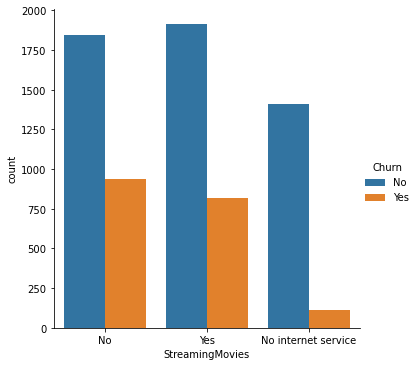

In [30]:
sn.catplot(x='StreamingMovies',hue='Churn',kind='count',data=df)

either with StreamingMovies or not max churn is  no in both cases almost

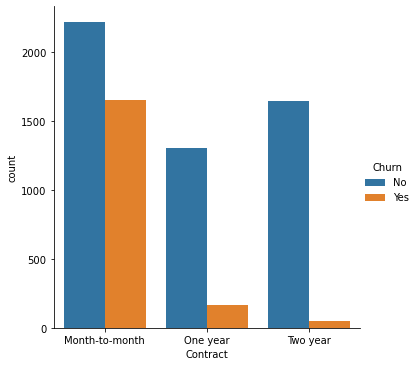

In [31]:
sn.catplot(x='Contract',hue='Churn',kind='count',data=df)

people with month to month contract have high chances of no churn

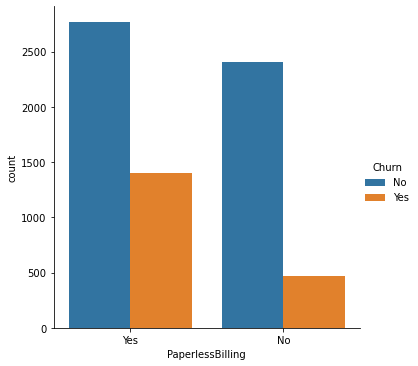

In [32]:
sn.catplot(x='PaperlessBilling',hue='Churn',kind='count',data=df)

people with paperless billing have high chance of no churn

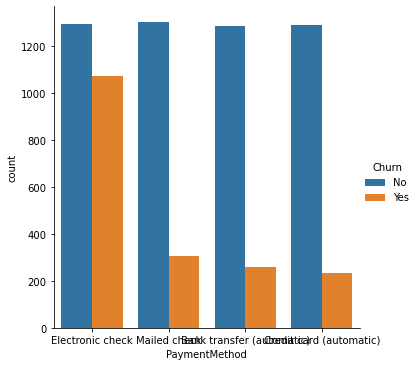

In [33]:
sn.catplot(x='PaymentMethod',hue='Churn',kind='count',data=df)

people with electronic check have the high chances of the churn being yes

In [21]:
a=df.describe(include=['O']).columns

saving all the object datatype in a variable

In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
for i in a:
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


encoded the object datatype columns

In [23]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


total charges and monthly charges have high difference in their 75 and max value outliers might be present

total charges might be skewed as its mean is more than median

<AxesSubplot:>

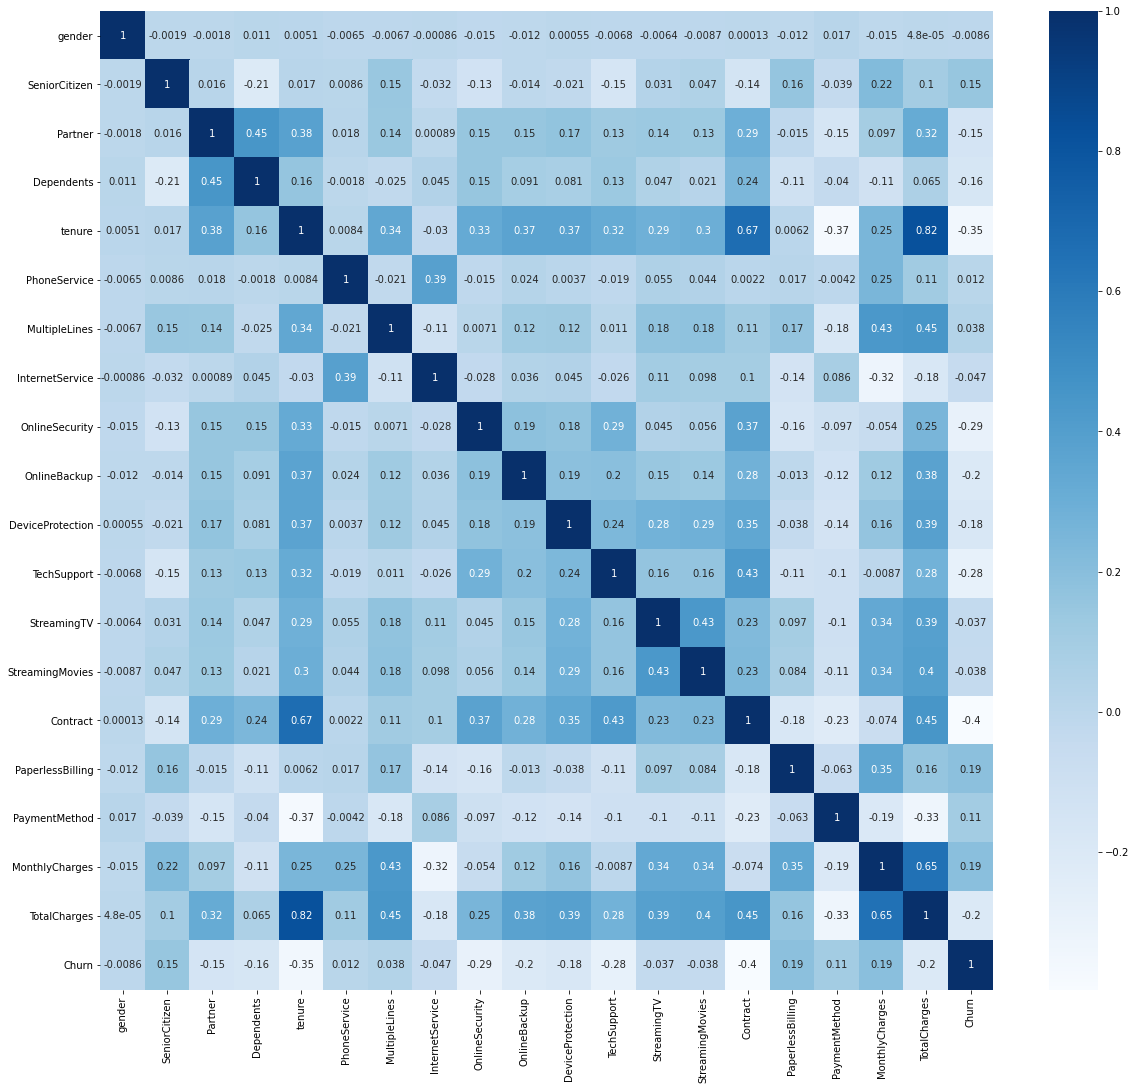

In [24]:
df_correlation=df.corr()
plt.figure(figsize=(20,18))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

paperlessbilling and monthly charges have the high correlation with churn target variable

tenure has the least correlation with the churn column

In [25]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df)

,variables,VIF FACTOR
0,gender,1.954282
1,SeniorCitizen,1.372903
2,Partner,2.821468
3,Dependents,1.963655
4,tenure,14.609295
5,PhoneService,15.181513
6,MultipleLines,2.757229
7,InternetService,4.382320
8,OnlineSecurity,2.259598
9,OnlineBackup,2.460627


monthly charges have the highest multicollinearity but will not drop the column as it has a good correlation too

gender                 AxesSubplot(0.125,0.657941;0.0824468x0.222059)
SeniorCitizen       AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
Partner             AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
Dependents          AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
tenure              AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
PhoneService        AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
MultipleLines       AxesSubplot(0.718617,0.657941;0.0824468x0.222059)
InternetService     AxesSubplot(0.817553,0.657941;0.0824468x0.222059)
OnlineSecurity         AxesSubplot(0.125,0.391471;0.0824468x0.222059)
OnlineBackup        AxesSubplot(0.223936,0.391471;0.0824468x0.222059)
DeviceProtection    AxesSubplot(0.322872,0.391471;0.0824468x0.222059)
TechSupport         AxesSubplot(0.421809,0.391471;0.0824468x0.222059)
StreamingTV         AxesSubplot(0.520745,0.391471;0.0824468x0.222059)
StreamingMovies     AxesSubplot(0.619681,0.391471;0.0824468x0.222059)
Contract            

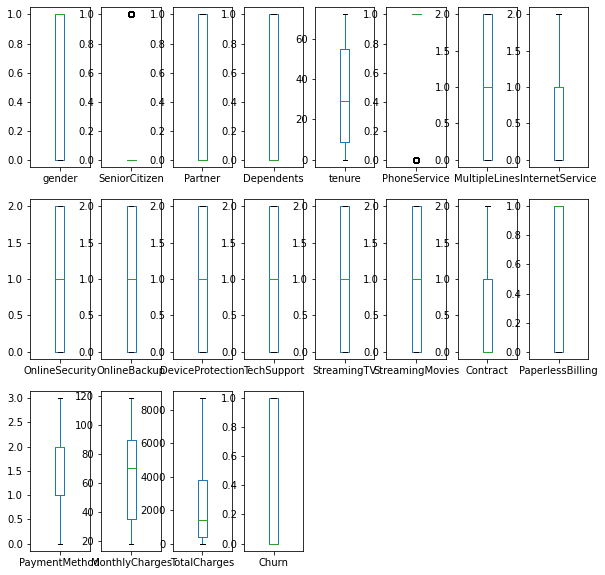

In [27]:
df.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,10))

there are many outliers present as legs cant be seen of the boxplot in many columns

In [28]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [29]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(6361, 20)

In [30]:
df.shape

(7043, 20)

In [31]:
Data_loss=((7043-6361)/7043)*100
Data_loss

9.683373562402386

as we can see after removal of the outliers dataloss is more than 8% hence we cannot remove the outliers

In [32]:
x=df.drop('Churn',axis=1)
y=df['Churn']
print(x.shape)
print(y.shape)

(7043, 19)
(7043,)


splitting the x and y variable for training and testing

In [33]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
dtype: float64

there is skewness present in total charges, we will neglect other column skewness level as other columns are categorical columns

In [34]:
x['TotalCharges']=np.sqrt(x['TotalCharges'])

In [35]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.307849
dtype: float64

skewness removed from all the columns

# Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.449636
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.100180
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.248349
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.077163
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.170252


scaled the data

# Sampling

In [37]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)
trainx.value_counts()
trainy.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

balanced the data

In [39]:
x=pd.DataFrame(trainx)
y=pd.DataFrame(trainy)

In [40]:
print(x.shape)
print(y.shape)

(10348, 19)
(10348, 1)


new x and y shape

# Training and Testing of model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=DecisionTreeClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.7982430453879942 on random state 103


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=103)

In [44]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of DecisionTreeClassifier() is:
0.7970717423133236
[[1328  330]
 [ 363 1394]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1658
           1       0.81      0.79      0.80      1757

    accuracy                           0.80      3415
   macro avg       0.80      0.80      0.80      3415
weighted avg       0.80      0.80      0.80      3415





In [45]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of DecisionTreeClassifier() is:  0.7877943322522725


In [62]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=RandomForestClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8638360175695461 on random state 81


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=81)

In [65]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of RandomForestClassifier() is:
0.8617862371888726
[[1444  233]
 [ 239 1499]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1677
           1       0.87      0.86      0.86      1738

    accuracy                           0.86      3415
   macro avg       0.86      0.86      0.86      3415
weighted avg       0.86      0.86      0.86      3415





In [66]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of RandomForestClassifier() is:  0.8496424560395812


In [67]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=LogisticRegression()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.7903367496339678 on random state 52


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=52)

In [69]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of LogisticRegression() is:
0.7903367496339678
[[1290  409]
 [ 307 1409]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1699
           1       0.78      0.82      0.80      1716

    accuracy                           0.79      3415
   macro avg       0.79      0.79      0.79      3415
weighted avg       0.79      0.79      0.79      3415





In [70]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of LogisticRegression() is:  0.7735806931398164


In [71]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=KNeighborsClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.7912152269399707 on random state 22


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=22)

In [73]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of KNeighborsClassifier() is:
0.7912152269399707
[[1185  557]
 [ 156 1517]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      1742
           1       0.73      0.91      0.81      1673

    accuracy                           0.79      3415
   macro avg       0.81      0.79      0.79      3415
weighted avg       0.81      0.79      0.79      3415





In [74]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of KNeighborsClassifier() is:  0.7894292325401662


after seeing the model the model performance and the cross val score least difference between the two is in KNeighborsClassifier model. we will select as our model

# Hyperparameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [76]:
parameter={'n_neighbors':np.arange(0,10),
          'weights':['uniform','distance'],
          'p':np.arange(0,10),
          'algorithm':['auto','ball_tree','kd_tree','brute']}

In [77]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=10)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [79]:
GCV.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [81]:
churn_mod=KNeighborsClassifier(algorithm='auto',n_neighbors=5,p=1,weights='distance')
churn_mod.fit(x_train,y_train)
pred=churn_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

82.92825768667643


after hyperparameter tuning our accuracy is 82.92%

# AUC-ROC

In [82]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [83]:
y_pred_prob=churn_mod.predict_proba(x_test)[:,1]

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

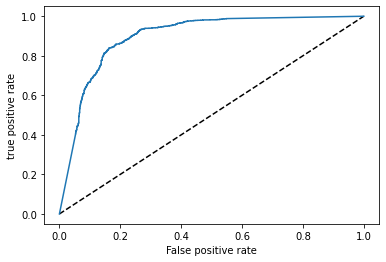

In [85]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.show()

as we can zsee from the graph it is little far from 1

In [87]:
auc_score=roc_auc_score(y_test,churn_mod.predict(x_test))
print(auc_score)

0.8308050533117666


our roc_auc_score and accuracy score is almost same

# Saving Model

In [88]:
import joblib
joblib.dump(churn_mod,"churnmodel.pkl")

['churnmodel.pkl']

saved the model